## Maria Martinez 15/11/2022

**Example dashboard**

## Bar color demo

`This is an example showing how to control bar color and legend entries using the color and label parameters of bar. Note that labels with a preceding underscore won't show up in the legend.`


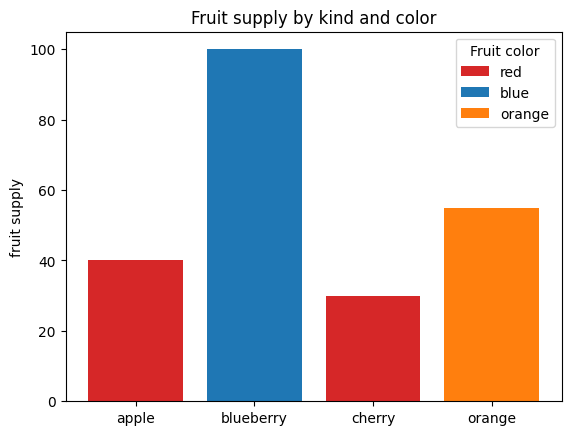

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

## Bar chart with gradients
`Matplotlib does not natively support gradients. However, we can emulate a gradient-filled rectangle by an AxesImage of the right size and coloring.
In particular, we use a colormap to generate the actual colors. It is then sufficient to define the underlying values on the corners of the image and let bicubic interpolation fill out the area. We define the gradient direction by a unit vector v. The values at the corners are then obtained by the lengths of the projections of the corner vectors on v.`

`A similar approach can be used to create a gradient background for an Axes. In that case, it is helpful to use Axes coordinates (extent=(0, 1, 0, 1), transform=ax.transAxes) to be independent of the data coordinates.`

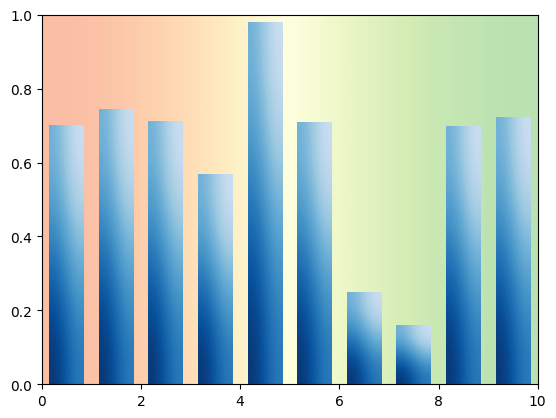

In [3]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)


def gradient_image(ax, extent, direction=0.3, cmap_range=(0, 1), **kwargs):
    """
    Draw a gradient image based on a colormap.

    Parameters
    ----------
    ax : Axes
        The axes to draw on.
    extent
        The extent of the image as (xmin, xmax, ymin, ymax).
        By default, this is in Axes coordinates but may be
        changed using the *transform* keyword argument.
    direction : float
        The direction of the gradient. This is a number in
        range 0 (=vertical) to 1 (=horizontal).
    cmap_range : float, float
        The fraction (cmin, cmax) of the colormap that should be
        used for the gradient, where the complete colormap is (0, 1).
    **kwargs
        Other parameters are passed on to `.Axes.imshow()`.
        In particular useful is *cmap*.
    """
    phi = direction * np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, extent=extent, interpolation='bicubic',
                   vmin=0, vmax=1, **kwargs)
    return im


def gradient_bar(ax, x, y, width=0.5, bottom=0):
    for left, top in zip(x, y):
        right = left + width
        gradient_image(ax, extent=(left, right, bottom, top),
                       cmap=plt.cm.Blues_r, cmap_range=(0, 0.8))


xmin, xmax = xlim = 0, 10
ymin, ymax = ylim = 0, 1

fig, ax = plt.subplots()
ax.set(xlim=xlim, ylim=ylim, autoscale_on=False)

# background image
gradient_image(ax, direction=1, extent=(0, 1, 0, 1), transform=ax.transAxes,
               cmap=plt.cm.RdYlGn, cmap_range=(0.2, 0.8), alpha=0.5)

N = 10
x = np.arange(N) + 0.15
y = np.random.rand(N)
gradient_bar(ax, x, y, width=0.7)
ax.set_aspect('auto')
plt.show()

## Scatter plots with a legend

`To create a scatter plot with a legend one may use a loop and create one scatter plot per item to appear in the legend and set the label accordingly.`

`The following also demonstrates how transparency of the markers can be adjusted by giving alpha a value between 0 and 1.`

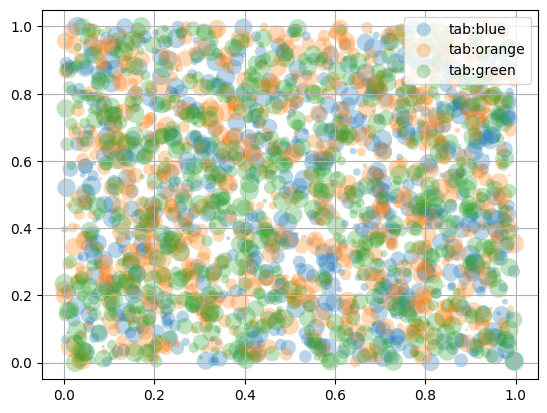

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)


fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    n = 750
    x, y = np.random.rand(2, n)
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()